# Importando as bibliotecas

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Importando e verificando os dados

In [139]:
df = pd.read_csv('datasets/Gastos_Publicidade_MelhoresCompras.csv')

df.head()

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
0,2022,1,Paginas web,87000.0,1000
1,2022,1,Redes sociais,120000.0,800
2,2022,1,TV,250000.0,1500
3,2022,1,Jornal,110000.0,730
4,2022,1,Revista,40000.0,360


In [140]:
df.describe().round(2)

,Ano,Mes,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
count,200.00,200.00,200.00,200.00
mean,2022.92,5.81,156151.31,1655.36
std,0.80,3.33,75946.11,1106.97
min,2022.00,1.00,11000.00,200.00
25%,2022.00,3.00,100800.00,822.00
50%,2023.00,5.50,139550.00,1400.00
75%,2024.00,8.25,203700.00,2132.00
max,2024.00,12.00,335664.00,5310.00


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Ano                                                      200 non-null    int64  
 1   Mes                                                      200 non-null    int64  
 2   Tipo de Midia                                            200 non-null    object 
 3   Gastos com Publicidade (em R$)                           200 non-null    float64
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [142]:
df.isnull().sum()

Ano                                                        0
Mes                                                        0
Tipo de Midia                                              0
Gastos com Publicidade (em R$)                             0
Previsao Inicial de Aumento de Vendas (em mil unidades)    0
dtype: int64

In [143]:
df['Tipo de Midia'].value_counts()

Tipo de Midia
Paginas web      31
Redes sociais    31
TV               31
Jornal           31
Revista          31
Radio            31
Instagram         7
Google            7
Name: count, dtype: int64

# Transformando os dados

In [144]:
df.rename(columns={'Gastos com Publicidade (em R$)': 'Gastos Publicidade',
                    'Previsao Inicial de Aumento de Vendas (em mil unidades)': 'Previsao de Aumento de Vendas'},
                      inplace= True)

In [145]:
# df['Tipo de Midia'] = df['Tipo de Midia'].apply(lambda x: 0 if x == 'Paginas web' 
#                                  else 1 if x == 'Redes sociais' 
#                                  else 2 if x == 'TV' 
#                                  else 3 if x == 'Jornal' 
#                                  else 4 if x == 'Revista'
#                                  else 5 if x == 'Radio' 
#                                  else 6 if x == 'Instagram'
#                                  else 7 if x == 'Google'
#                                  else x)


In [146]:
df.head()

,Ano,Mes,Tipo de Midia,Gastos Publicidade,Previsao de Aumento de Vendas
0,2022,1,Paginas web,87000.0,1000
1,2022,1,Redes sociais,120000.0,800
2,2022,1,TV,250000.0,1500
3,2022,1,Jornal,110000.0,730
4,2022,1,Revista,40000.0,360


# Criando a coluna de ROI

In [147]:
df_agrupado = df.groupby(['Ano', 'Mes', 'Tipo de Midia'])[['Gastos Publicidade', 'Previsao de Aumento de Vendas']].mean().reset_index()

df_agrupado['ROI'] = df_agrupado['Previsao de Aumento de Vendas'] / df_agrupado['Gastos Publicidade']

df_agrupado.head()

,Ano,Mes,Tipo de Midia,Gastos Publicidade,Previsao de Aumento de Vendas,ROI
0,2022,1,Jornal,110000.0,730.0,0.006636
1,2022,1,Paginas web,87000.0,1000.0,0.011494
2,2022,1,Radio,75000.0,450.0,0.006000
3,2022,1,Redes sociais,120000.0,800.0,0.006667
4,2022,1,Revista,40000.0,360.0,0.009000


In [148]:
# Convertendo "Tipo de Midia" para variáveis dummy usando pd.get_dummies()
df_agrupado = pd.get_dummies(df_agrupado, columns=['Tipo de Midia'], prefix='Midia')

# Criando e testando os Modelos 

In [149]:
# Separando os dados em conjuntos de treino e teste
X = df_agrupado[['Gastos Publicidade', 'Midia_Paginas web', 'Midia_Redes sociais', 'Midia_TV', 'Midia_Jornal', 'Midia_Revista', 'Midia_Radio', 'Midia_Instagram', 'Midia_Google']]
y = df_agrupado["Previsao de Aumento de Vendas"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
score_linear = r2_score(y_test, y_pred_linear)
print(f"R² da Regressão Linear: {score_linear}")

R² da Regressão Linear: 0.9708531119028957


In [150]:
# Regressão Polinomial (com grau 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_polynomial = model_poly.predict(X_test_poly)
score_polynomial = r2_score(y_test, y_pred_polynomial)
print(f"R² da Regressão Polinomial: {score_polynomial}")

R² da Regressão Polinomial: 0.9767544122004896


# Teste de hipoteses

In [151]:
alpha = 0.05  # Nível de significância

# Teste t de uma amostra para a Regressão Linear
t_stat, p_valor = stats.ttest_1samp(y_test - y_pred_linear, popmean=0)
print(f"Regressão Linear: Estatística t = {t_stat:.2f}, p-valor = {p_valor:.4f}")
if p_valor < alpha:
  print("Regressão Linear: Aceito H1 e rejeito H0 (diferença significativa, modelo não está preciso)")
else:
  print("Regressão Linear: Aceito H0 e rejeito H1 (não há diferença significativa, modelo está preciso)")

# Teste t de uma amostra para a Regressão Polinomial
t_stat, p_valor = stats.ttest_1samp(y_test - y_pred_polynomial, popmean=0)
print(f"Regressão Polinomial: Estatística t = {t_stat:.2f}, p-valor = {p_valor:.4f}")
if p_valor < alpha:
  print("Regressão Polinomial: Aceito H1 e rejeito H0 (diferença significativa, modelo não está preciso)")
else:
  print("Regressão Polinomial: Aceito H0 e rejeito H1 (não há diferença significativa, modelo está preciso)")

Regressão Linear: Estatística t = 1.54, p-valor = 0.1304
Regressão Linear: Aceito H0 e rejeito H1 (não há diferença significativa, modelo está preciso)
Regressão Polinomial: Estatística t = 1.90, p-valor = 0.0652
Regressão Polinomial: Aceito H0 e rejeito H1 (não há diferença significativa, modelo está preciso)


# Criando o gráfico de resíduos

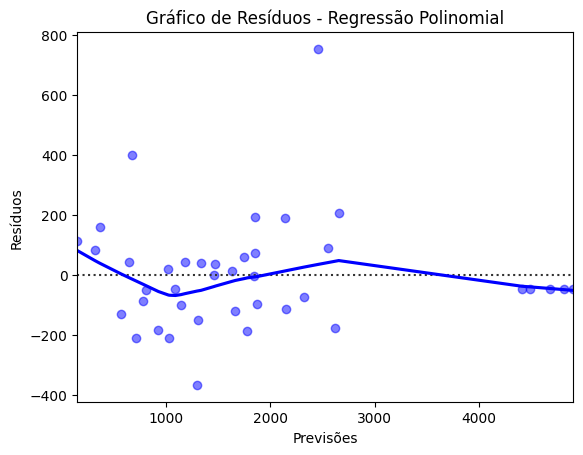

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o DataFrame de resíduos
residuos = pd.DataFrame({'Previsao': y_pred_polynomial, 'Real': y_test, 'Residuo': y_test - y_pred_polynomial})

# Plotando o gráfico de resíduos
sns.residplot(x='Previsao', y='Residuo', data=residuos, lowess=True, color='blue', scatter_kws={'alpha': 0.5})
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos - Regressão Polinomial')
plt.show()

In [153]:
coeficientes = pd.DataFrame({'Coeficiente': model.coef_}, index=X.columns)

coeficientes['ROI'] = coeficientes['Coeficiente'] / [1, 1, 1, 1, 1, 1, 1, 1, 1]  # Dividindo pelo valor correspondente da coluna 'Gastos Publicidade'
print(coeficientes)

                     Coeficiente          ROI
Gastos Publicidade      0.011333     0.011333
Midia_Paginas web    -208.053965  -208.053965
Midia_Redes sociais  -965.141713  -965.141713
Midia_TV            -1612.405425 -1612.405425
Midia_Jornal         -871.004383  -871.004383
Midia_Revista        -567.300479  -567.300479
Midia_Radio          -688.626291  -688.626291
Midia_Instagram      2442.398514  2442.398514
Midia_Google         2470.133742  2470.133742


In [154]:
melhor_retorno = coeficientes['ROI'].idxmax()
pior_retorno = coeficientes['ROI'].idxmin()

print(f"A categoria com o melhor retorno é: {melhor_retorno}")
print(f"A categoria com o pior retorno é: {pior_retorno}")

A categoria com o melhor retorno é: Midia_Google
A categoria com o pior retorno é: Midia_TV


## Interpretação dos Coeficientes:

`Gastos Publicidade`: Um aumento de 1 real nos gastos com publicidade em qualquer categoria (mantendo as demais fixas) leva a um `aumento` de R$ 0,0113 nas vendas previstas.

`Midia_Paginas web`: Um aumento de 1 real no gasto com páginas web (mantendo outras mídias fixas) leva a uma `redução` de R$ 208,05 nas vendas previstas.

`Midia_Redes sociais`: Um aumento de 1 real no gasto com redes sociais (mantendo outras mídias fixas) leva a uma `redução` de R$ 965,14 nas vendas previstas.

`Midia_TV`: Um aumento de 1 real no gasto com TV (mantendo outras mídias fixas) leva a uma `redução` de R$ 1612,41 nas vendas previstas.

`Midia_Jornal`: Um aumento de 1 real no gasto com jornal (mantendo outras mídias fixas) leva a uma `redução` de R$ 871,00 nas vendas previstas.

`Midia_Revista`: Um aumento de 1 real no gasto com revista (mantendo outras mídias fixas) leva a uma `redução` de R$ 567,30 nas vendas previstas.

`Midia_Radio`: Um aumento de 1 real no gasto com rádio (mantendo outras mídias fixas) leva a uma `redução` de R$ 688,63 nas vendas previstas.

`Midia_Instagram`: Um aumento de 1 real no gasto com Instagram (mantendo outras mídias fixas) leva a um `aumento` de R$ 2442,40 nas vendas previstas.

`Midia_Google`: Um aumento de 1 real no gasto com Google (mantendo outras mídias fixas) leva a um `aumento` de R$ 2470,13 nas vendas previstas.